In [86]:
import pandas as pd
import numpy as np

def process_file(file_path, currency):
    df = pd.read_csv(file_path)
    
    # convert date columns to dd-mm-yyyy format
    df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%d-%m-%Y')
    df.set_index('Date', inplace=True)
    
    # columns to be kept
    columns_to_keep = ['Close']

    # converts numbers to floating point and removes commas
    for col in columns_to_keep:
        df[col] = df[col].replace(',', '', regex=True).astype(float)
    
    # add the currency as a suffix to the retained columns
    df = df[columns_to_keep]
    df.columns = [f"{col}_{currency}" for col in columns_to_keep]
    
    return df

file_paths = {
    'ETH-EUR.csv': 'ETH',
    'BTC-EUR.csv': 'BTC',
    'DOGE-EUR.csv': 'DOGE',
    'USDT-EUR.csv': 'USDT',
    'XRP-EUR.csv': 'XRP'
}

# place the adjusted data in the dictionary
dataframes = {}
for file, code in file_paths.items():
    df_processed = process_file(file, code)
    dataframes[code] = df_processed

# merge all data frames
combined_df = pd.concat(dataframes.values(), axis=1)

# define a function that cleans the data
def clean_data(df):
    
    # check for NaN and infinity values
    if df.isna().any().any() or np.isinf(df).any().any():
        
        # handle NaN values 
        df = df.ffill().bfill()
        
        # handle infinity values
        df.replace([np.inf, -np.inf], np.nan, inplace=True)

    return df

df_clean = clean_data(combined_df)
print(df_clean.head())

            Close_ETH  Close_BTC  Close_DOGE  Close_USDT  Close_XRP
Date                                                               
03-12-2022    1197.98    16518.0    0.096193      0.9497     0.3720
02-12-2022    1226.21    16576.0    0.094563      0.9496     0.3733
01-12-2022    1213.19    16494.0    0.096057      0.9502     0.3771
30-11-2022    1245.53    16659.0    0.101825      0.9606     0.3940
29-11-2022    1180.11    16029.0    0.098496      0.9674     0.3865


In [87]:
## Test 1 Pearson Correlation Coefficient

"""
Hypothesis 1 (Correlation Among Cryptocurrencies):

Null Hypothesis (H0): There is no significant correlation 
between the market values of Ethereum and other cryptocurrencies.

Alternative Hypothesis (H1): Market values of Ethereum exhibit a significant correlation 
with other cryptocurrencies.
"""

from scipy.stats import pearsonr

# initialise two dictionaries to store coefficients and p-values
correlations = {}
p_values = {}

for column in df_clean.columns:
    
    # exclude the ETH column
    if column != 'Close_ETH':  
        corr, p_value = pearsonr(df_clean['Close_ETH'], df_clean[column])
        
        correlations[column.replace('Close_', '')] = corr
        p_values[column.replace('Close_', '')] = p_value

        # check if the p-value is less than 0.05
        if p_value < 0.05:
            print(f"ETH has a significant correlation with {column.replace('Close_', '')}: Pearson Correlation Coefficient = {corr:.4f}, p-value = {p_value:.4f}")
        else:
            print(f"ETH does not have a significant correlation with {column.replace('Close_', '')}: Pearson Correlation Coefficient = {corr:.4f}, p-value = {p_value:.4f}")

ETH has a significant correlation with BTC: Pearson Correlation Coefficient = 0.9665, p-value = 0.0000
ETH has a significant correlation with DOGE: Pearson Correlation Coefficient = 0.9066, p-value = 0.0000
ETH has a significant correlation with USDT: Pearson Correlation Coefficient = -0.7843, p-value = 0.0000
ETH has a significant correlation with XRP: Pearson Correlation Coefficient = 0.8995, p-value = 0.0000


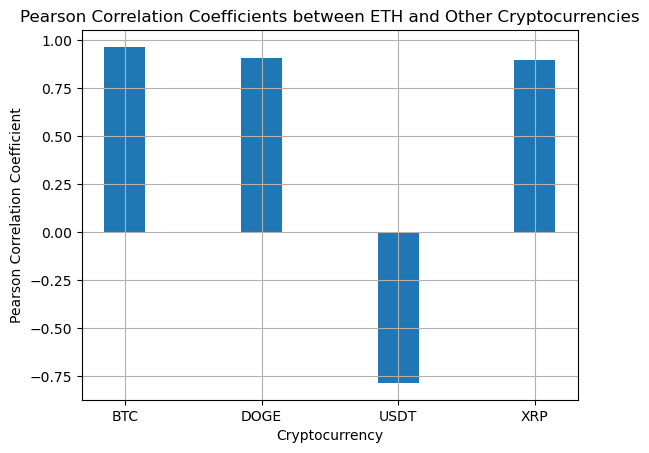

In [88]:
import matplotlib.pyplot as plt

# plot the graph
plt.bar(correlations.keys(), correlations.values(), width=0.3) 
plt.title('Pearson Correlation Coefficients between ETH and Other Cryptocurrencies')
plt.xlabel('Cryptocurrency')
plt.ylabel('Pearson Correlation Coefficient')
plt.grid(True)
plt.show()

In [89]:
## Spearman's Rank Correlation Coefficient

from scipy.stats import spearmanr

# initialise two dictionaries to store coefficients and p-values
correlations = {}
p_values = {}

for column in df_clean.columns:
    
    # exclude the ETH column
    if column != 'Close_ETH':  
        corr, p_value = spearmanr(df_clean['Close_ETH'], df_clean[column])
        
        correlations[column.replace('Close_', '')] = corr
        p_values[column.replace('Close_', '')] = p_value

        # check if the p-value is less than 0.05
        if p_value < 0.05:
            print(f"ETH has a significant correlation with {column.replace('Close_', '')}: Spearman Correlation Coefficient = {corr:.4f}, p-value = {p_value:.4f}")
        else:
            print(f"ETH does not have a significant correlation with {column.replace('Close_', '')}: Spearman Correlation Coefficient = {corr:.4f}, p-value = {p_value:.4f}")

ETH has a significant correlation with BTC: Spearman Correlation Coefficient = 0.9521, p-value = 0.0000
ETH has a significant correlation with DOGE: Spearman Correlation Coefficient = 0.8503, p-value = 0.0000
ETH has a significant correlation with USDT: Spearman Correlation Coefficient = -0.7457, p-value = 0.0000
ETH has a significant correlation with XRP: Spearman Correlation Coefficient = 0.8445, p-value = 0.0000


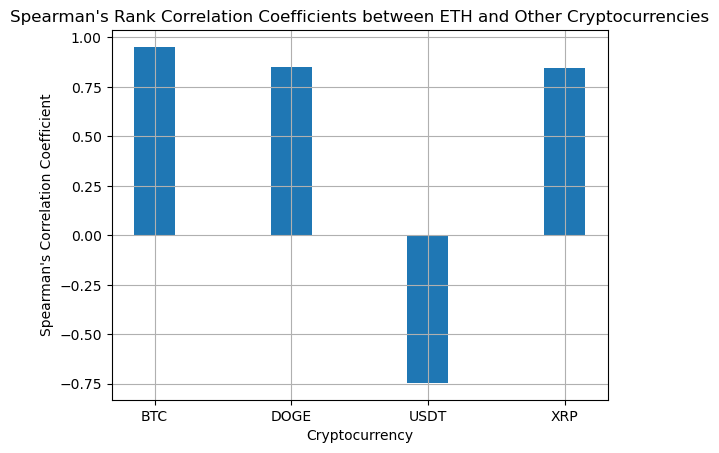

In [90]:
import matplotlib.pyplot as plt

# plot the graph

plt.bar(correlations.keys(), correlations.values(), width=0.3) 
plt.title("Spearman's Rank Correlation Coefficients between ETH and Other Cryptocurrencies")
plt.xlabel('Cryptocurrency')
plt.ylabel("Spearman's Correlation Coefficient")
plt.grid(True)
plt.show()

In [112]:
## Use Augmented Dickey-Fuller (ADF) to test for time series stationarity
## Because the time series is not stationary, we need to perform a differencing operation on the data

import pandas as pd
from statsmodels.tsa.stattools import adfuller

columns = ['Close_ETH', 'Close_BTC', 'Close_DOGE', 'Close_USDT', 'Close_XRP']

# create a DataFrame to store the differenced series
diff_df = pd.DataFrame()

for column in columns:
    
    # first-order differencing of time series
    diff_series = df_clean[column].diff().dropna()
    
    # add differenced series to the df
    diff_df[column] = diff_series
   
    adf_result = adfuller(diff_series)

    print(f"Results for {column}:")
    print('ADF Statistic: %f' % adf_result[0])
    print('p-value: %f' % adf_result[1])
    
    # test if time series are stationary by checking if the p value is less than 0.05
    if adf_result[1] < 0.05:
        print(f"The time series of {column} is stationary after differencing.\n")
    else:
        print(f"The time series of {column} is not stationary after differencing.\n") 
    print("\n" + "-"*50 + "\n")

Results for Close_ETH:
ADF Statistic: -9.807340
p-value: 0.000000
The time series of Close_ETH is stationary after differencing.


--------------------------------------------------

Results for Close_BTC:
ADF Statistic: -19.114451
p-value: 0.000000
The time series of Close_BTC is stationary after differencing.


--------------------------------------------------

Results for Close_DOGE:
ADF Statistic: -6.009896
p-value: 0.000000
The time series of Close_DOGE is stationary after differencing.


--------------------------------------------------

Results for Close_USDT:
ADF Statistic: -10.488010
p-value: 0.000000
The time series of Close_USDT is stationary after differencing.


--------------------------------------------------

Results for Close_XRP:
ADF Statistic: -18.843878
p-value: 0.000000
The time series of Close_XRP is stationary after differencing.


--------------------------------------------------



In [106]:
## VAR model

from statsmodels.tsa.api import VAR

# create a VAR model and ensure that there are no NaN values.
model = VAR(diff_df.dropna())

# evaluate each of the possible lag orders (from 1 to 30) 
selected_orders = model.select_order(30)  
print(selected_orders.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0      -8.454*     -8.397*  0.0002131*     -8.431*
1       -8.404      -8.063   0.0002239      -8.268
2       -8.323      -7.697   0.0002430      -8.073
3       -8.323      -7.413   0.0002429      -7.960
4       -8.263      -7.067   0.0002582      -7.786
5       -8.194      -6.714   0.0002767      -7.604
6       -8.160      -6.396   0.0002865      -7.457
7       -8.114      -6.065   0.0003006      -7.297
8       -8.032      -5.698   0.0003269      -7.102
9       -8.008      -5.389   0.0003359      -6.964
10      -7.932      -5.029   0.0003632      -6.775
11      -7.875      -4.687   0.0003861      -6.604
12      -7.823      -4.350   0.0004087      -6.439
13      -7.736      -3.978   0.0004485      -6.238
14      -7.672      -3.630   0.0004810      -6.061
15      -7.608      -3.282   0.0005168      -5.883
16      -7.526      -2.915   0.

/Users/ryan/miniconda3/envs/progLab/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [116]:
## Johansen’s Test: 

from statsmodels.tsa.vector_ar.vecm import coint_johansen

def johansen_test(data, det_order=-1, k_ar_diff=1):
    """
    Define a function that runs Johansen's Test.
    
    The det_order parameter determines the type of deterministic trend in the test:
    A value of '-1' means that no deterministic component is included in the model, 
    i.e., there are no constant or trend terms.
    A value of '0' represents a model that includes a constant term, but no linear trend term.
    A value of '1' represents a model that includes both a constant term and a linear trend term.
    
    The information criterion recommends the use of order 0 hysteresis.
    This means that the model considers the current value to be unaffected by its own past values.
    We still chose a lag order (1st order) to experiment with for practical reasons.
    
    """
    test_result = coint_johansen(data, det_order=det_order, k_ar_diff=k_ar_diff)
    return test_result

for code in file_paths.values():
    
    # exclude the ETH column
    if code != 'ETH': 

        # create df with the ETH and the other cryptocurrency
        pair_columns = [f'Close_ETH', f'Close_{code}']
        
        # drop missing values
        pair_df = combined_df[pair_columns].dropna()  

        print(f"Testing cointegration between ETH and {code}:")
        johansen_test_results = johansen_test(pair_df)

        # display the results 
        
        # Eigenvalues are used to determine the strength of the covariance between variables.
        print("Eigenvalues:", johansen_test_results.eig)
        
        # Trace Statistics tests for the existence of a cointegration relationship.
        print("Trace Statistics:", johansen_test_results.lr1)
        print("Critical Values (Trace):", johansen_test_results.cvt)
        
        # Max-Eigen Statistics is used to test the statistics of cointegration relationship.
        print("Max-Eigen Statistics:", johansen_test_results.lr2)
        print("Critical Values (Max-Eigen):", johansen_test_results.cvm)

        # conclusions
        
        # extract the first value of the trace statistic and the corresponding critical value
        trace_stat, crit_value_trace = johansen_test_results.lr1[0], johansen_test_results.cvt[0, 1]
        
        # extract the first value of the maximum eigenroot statistic and the corresponding critical value
        max_stat, crit_value_max = johansen_test_results.lr2[0], johansen_test_results.cvm[0, 1]
        
        # if trace_stat is greater than crit_value_trace and max_stat is greater than crit_value_max, then there is a cointegration relationship
        if trace_stat > crit_value_trace and max_stat > crit_value_max:
            print(f"Cointegration exists: There is a significant market value correlation between ETH and {code}")
        else:
            print(f"No cointegration: There is no significant market value correlation between ETH and {code}")

        print("\n" + "-"*50 + "\n")


Testing cointegration between ETH and BTC:
Eigenvalues: [0.00932848 0.00566917]
Trace Statistics: [5.4809537 2.0694484]
Critical Values (Trace): [[10.4741 12.3212 16.364 ]
 [ 2.9762  4.1296  6.9406]]
Max-Eigen Statistics: [3.4115053 2.0694484]
Critical Values (Max-Eigen): [[ 9.4748 11.2246 15.0923]
 [ 2.9762  4.1296  6.9406]]
No cointegration: There is no significant market value correlation between ETH and BTC

--------------------------------------------------

Testing cointegration between ETH and DOGE:
Eigenvalues: [0.03191472 0.00368313]
Trace Statistics: [13.14950897  1.34313483]
Critical Values (Trace): [[10.4741 12.3212 16.364 ]
 [ 2.9762  4.1296  6.9406]]
Max-Eigen Statistics: [11.80637414  1.34313483]
Critical Values (Max-Eigen): [[ 9.4748 11.2246 15.0923]
 [ 2.9762  4.1296  6.9406]]
Cointegration exists: There is a significant market value correlation between ETH and DOGE

--------------------------------------------------

Testing cointegration between ETH and USDT:
Eigenva

In [123]:
## Test 2 Cross-correlation test
# We use the differenced stationary dataset for cross-correlation in time series analysis

import numpy as np
from scipy import signal

eth_column = diff_df['Close_ETH']
currencies = ['Close_BTC', 'Close_DOGE', 'Close_USDT', 'Close_XRP']

for currency in currencies:
    other_column = diff_df[currency]
    
    # calculate the cross correlation
    correlation = signal.correlate(eth_column, other_column, mode="full")
   
    # calculate the time lag
    lags = signal.correlation_lags(eth_column.size, other_column.size, mode="full")
    
    # find the maximum correlation lag
    max_corr_lag = lags[np.argmax(correlation)]
    
    print(f"Max correlation lag between ETH and {code}: {max_corr_lag}")

Max correlation lag between ETH and XRP: 0
Max correlation lag between ETH and XRP: 0
Max correlation lag between ETH and XRP: 189
Max correlation lag between ETH and XRP: 0
